# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

To solve this exercise you will use Numpy, OpenCV, Scipy, Matplotlib, and Skimage.
This is a formidable stack of python tools. Master them and you will be unstoppable!

Consult the docs: 
- http://docs.opencv.org
- https://numpy.org/doc/stable/
- https://scikit-image.org/docs/stable/api/skimage.html
- https://docs.scipy.org/doc//scipy/index.html
- https://matplotlib.org/stable/index.html

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [164]:
import cv2
import numpy as np
import scipy.linalg

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from `scikit-image` (`skimage`). This package can also be installed my means of `pip install scikit-image`.

In [165]:
import skimage.data

In [166]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [167]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

Let's plot the image using `matplotlib`'s `pyplot` (`plt`)

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

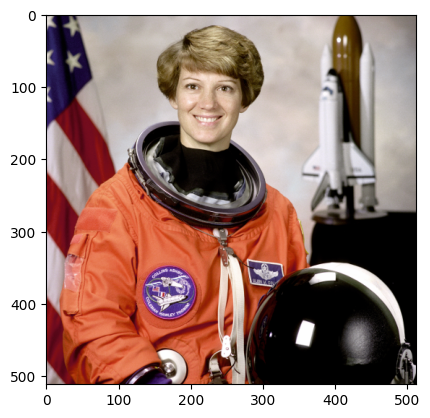

In [169]:
plt.imshow(image)

In [170]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

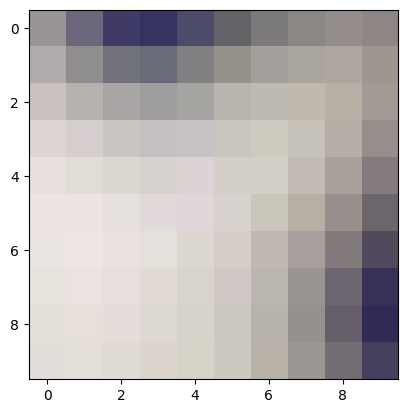

In [171]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

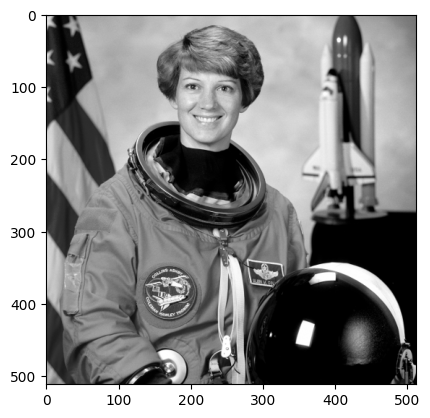

In [172]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [173]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


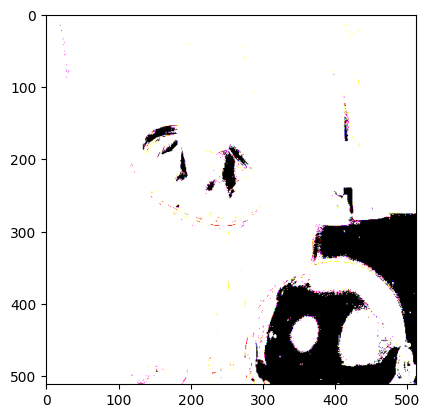

In [174]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

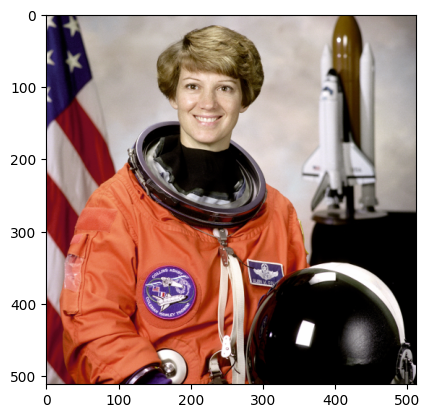

In [175]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

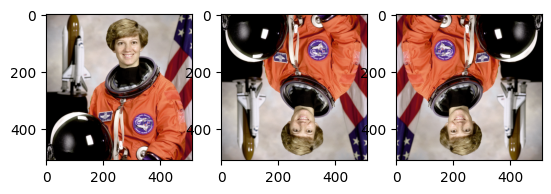

In [176]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

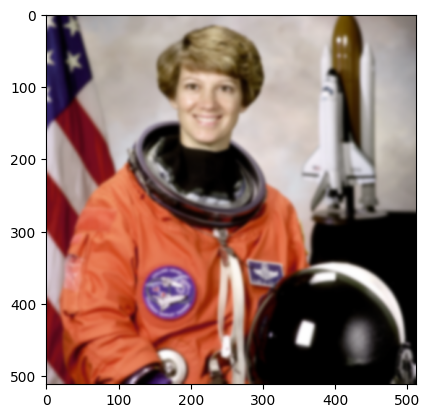

In [177]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

In the next sections you will code by yourself. Follow the hints as to what functions to use. Read up about them in the docs.

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter** (`cv2.GaussianBlur`)

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

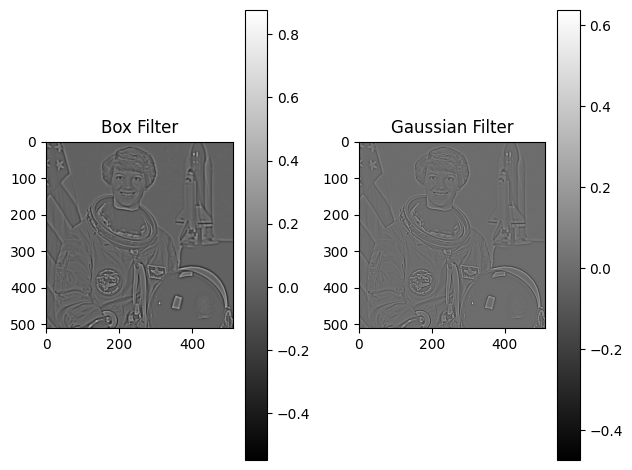

In [ ]:
#1 Load the astronaut image and Convert to grayscale
image = skimage.data.astronaut()
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Converting to floating point
image_gray = image_gray.astype(np.float32) / 255.0
#2 Apply 11x11 Box filter
image_box_blur = cv2.boxFilter(image_gray, -1, (11, 11))
#2 Apply 11x11 Gaussian filter
image_gaussian_blur = cv2.GaussianBlur(image_gray, (11, 11), 0)
#3 Subtract the blurred images from the original
image_box_diff = image_gray - image_box_blur
image_gaussian_diff = image_gray - image_gaussian_blur
#4 Show the results side-by-side with colorbars
plt.subplot(1, 2, 1)
plt.imshow(image_box_diff, cmap='gray')
plt.colorbar()
plt.title('Box Filter')

plt.subplot(1, 2, 2)
plt.imshow(image_gaussian_diff, cmap='gray')
plt.colorbar()
plt.title('Gaussian Filter')

plt.tight_layout()
plt.show()

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (use `cv2.cvtColor`)

3) Display the H, S and V components, side-by-side (`plt.subplot`, `plt.imshow`), each component (a.k.a "plane") in the image can be accessed by e.g. `image[..., 2]` for the 3rd component.

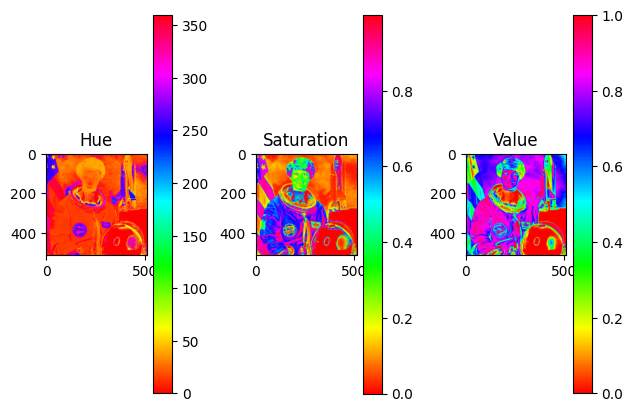

In [179]:
# Load the astronaut image (RGB) and convert to [0,1] float
image = np.float32(skimage.data.astronaut()) / 255.

# Convert to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Display H, S, and V components side-by-side
#Hue
plt.subplot(1, 3, 1)
plt.imshow(image_hsv[..., 0], cmap='hsv')
plt.colorbar()
plt.title('Hue')

#Saturation 
plt.subplot(1, 3, 2)
plt.imshow(image_hsv[..., 1], cmap='hsv')
plt.colorbar()
plt.title('Saturation')

#Value
plt.subplot(1, 3, 3)
plt.imshow(image_hsv[..., 2], cmap='hsv')
plt.colorbar()
plt.title('Value')

plt.tight_layout()
plt.show()

Change only the brightness of the image (add 0.2 to the `v`, "value", component) and display it again as the original. 
You will need to `cv2.cvtColor` back to RGB using `cv2.COLOR_HSV2RGB`.

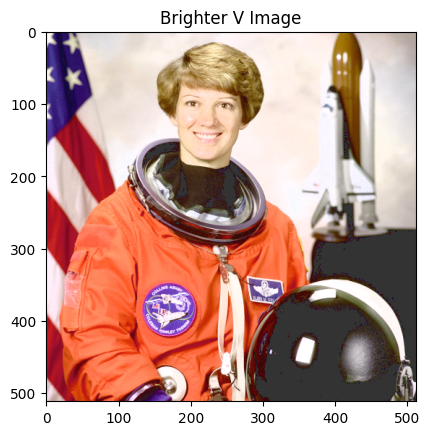

In [248]:
#converting to HSV
image = np.float32(skimage.data.astronaut()) / 255.
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Add 0.2 to the V (value) component and clip to [0, 1] range
image_hsv[..., 2] = np.clip(image_hsv[..., 2] + 0.2, 0, 1)

# Convert back to RGB
image_brightened = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# Display the brightened image
plt.imshow(image_brightened)
plt.title('Brighter V Image')
plt.show()

Plot all the colors in the astronaut image on the `rg` plane

First, normalize the colors, e.g. `r = R / (R + G + B)` and `g = G / (R + G + B)` and `b = B / (R + G + B)`

Use `np.sum` on the last (-1) axis, and add `np.finfo(np.float32).eps` to avoid division by zero

Then use a scatter plot `ax.scatter` to show the points (use `s=1` to make the points smaller)

For each point in the scatter show its color by adding `c=np.dstack([r,g,b]).reshape(-1,3)` to the `.scatter(` call

Thinking point: how much of the visible color gamut does this image cover?

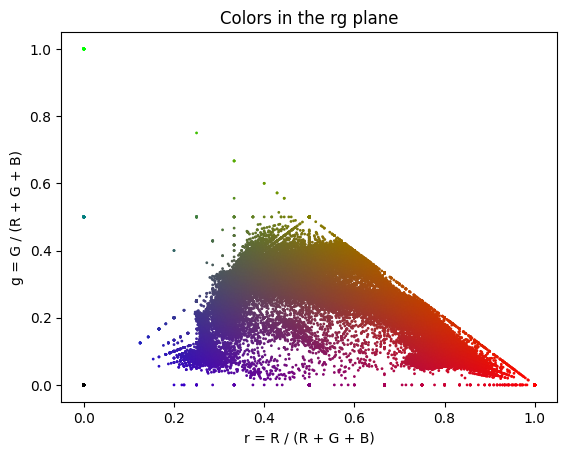

In [ ]:
image = np.float32(skimage.data.astronaut()) / 255.
fig, ax = plt.subplots()

# Compute the sum of the three channels on the last axis (-1)
# Add np.finfo(np.float32).eps as directed
summ = np.sum(image, axis=-1) + np.finfo(np.float32).eps

r = image[..., 0] / summ
g = image[..., 1] / summ
b = image[..., 2] / summ

# Using the scatter function to plot the points
ax.scatter(r.reshape(-1), g.reshape(-1), s=1, c=np.dstack([r,g,b]).reshape(-1,3))
ax.set_xlabel('r = R / (R + G + B)')
ax.set_ylabel('g = G / (R + G + B)')
ax.set_title('RG plane')
plt.show()

---

## Least Squares

Let's practice a little bit of least squares fitting (under some conditions you may know this as "linear regression")

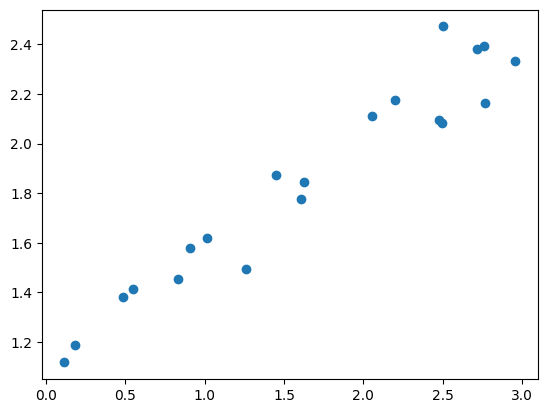

In [255]:
# ramdomize 20 2d points around a line with the given slope and intercept
slope = 0.5
intercept = 1
pts2d = np.random.uniform(0,3,(20,2))
pts2d[:,1] = slope * pts2d[:,0] + intercept
pts2d += np.random.normal(0,0.1,(20,2))
plt.scatter(pts2d[:,0],pts2d[:,1])

[0.43365007 1.13349604]


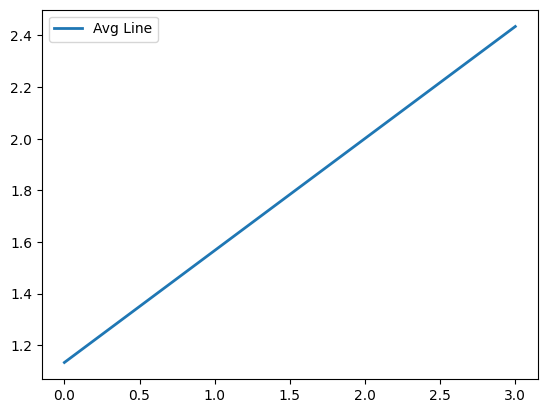

In [256]:
# fit a line to the points using linear least squares from scipy
from scipy.optimize import least_squares

# TODO: your code here
def objective_fun(x, pts):
    # write the objective function here to minimize the error between the line and the points
    # x[0] is the slope, x[1] is the intercept
    # return the error, which is the difference between the line and the points
    x_coords = pts[:,0]
    y_coords = pts[:,1]
    y_pred = x[0] * x_coords + x[1]  # predicted y = slope*x + intercept
    return y_pred - y_coords  # residual vector

# use least_squares to minimize the error objective_fun
# send the initial guess [0,0] and the points pts2d
# res is the result from least_squares
# TODO: your code here
# res = ...
initial_guess = [0, 0]
res = least_squares(objective_fun, initial_guess, args=(pts2d,))
print(res.x)

# plot the line
# res is the result from least_squares
# res.x[0] is the slope, res.x[1] is the intercept
# pts2d is the 2d points, use pts2d[:,0] to get the x coordinates and multiply by the slope and add the intercept
# use plt.scatter to plot the points and plt.plot to plot the line
# plt.show() to show the plot
# TODO: your code here
# plt.plot(...)
x_fit = np.linspace(0, 3, 100)
y_fit = res.x[0] * x_fit + res.x[1]
plt.plot(x_fit, y_fit, '-', linewidth=2, label='Avg Line')
plt.legend()
plt.show()

In the next cell we will use SVD to fit a 3D plane "in the least squares sense". Recall our conversation in class about homogenous systems of linear equations.

The 3D plane has the form `a*x + b*y + c*z + d = 0` where `(a, b, c)` is effectively the normal to the plane and `d` is the distance from the origin.

With the 3D data below we will do a "trick". Subtract the centroid (mean, average) of the values so that they all center around 0, 0, 0. 

This will make finding the best fit plane easier, since now we're only looking for a "direction" - the normal to the plane. We eliminate the plane's last parameter - distance from the origin.

Luckily the SVD can give us just that!

[-0.20213842  0.7794594  -0.5929444 ]


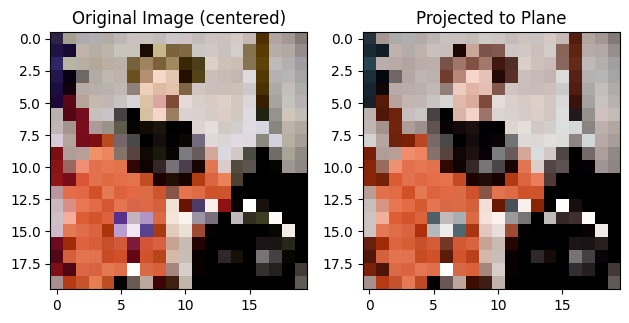

In [257]:
# we will use the pixel colors of the astronaut image as our 3D points

# Take all the pixel colors (r, g, b) in the astronaut image and cast them to [0,1] float (divide by 255.)
image = np.float32(skimage.data.astronaut()) / 255.

# Resize the image to 20x20
image = cv2.resize(image, (20, 20))
#plt.imshow(image)
# Reshape the image pixels array to a list of 3D points
# use np.reshape to reshape the image to a 2D array with shape (-1, 3)
image_flat = np.reshape(image, (-1, 3))
#plt.imshow(image_flat)


# use np.mean to get the mean of the pixels colors
mean_color = np.mean(image_flat, axis=0)

#Subtracting the mean color from the pixels colors
image_flat = image_flat - mean_color

# use np.linalg.svd to get the singular values and vectors of the pixels colors matrix
_, _, vT = np.linalg.svd(image_flat, full_matrices=False)
# the plane parameters are the last singular vector, get the last (-1) singular vector from vT
v = vT[-1]

print(v)

# project the pixels colors to the 3D plane by multiplying the pixels colors by the plane parameters
# loop over the pixels array and set the pixels colors to the projected colors
image_projected = np.zeros(image_flat.shape)
for i in range(image_flat.shape[0]):
    # project point image_flat[i] to the plane. the plane parameters are v. 
    # remember that point to plane projection is: p - (p dot v) * v
    # use np.dot to multiply the pixels color by the plane parameters
    # then subtract the projected point from the pixels color
    image_projected[i] = image_flat[i] - np.dot(image_flat[i], v) * v

# plot the original image *and* the projected image in 2 subplots
# reshape image_flat and image_projected to the original shape (image.shape) by using np.reshape
# remember to add the mean color to the pixels colors!
image_flat_reshaped = np.reshape(image_flat + mean_color, image.shape)
image_projected_reshaped = np.reshape(image_projected + mean_color, image.shape)

#i'm assuming for the images below that you don't want them to be resized, including the original
plt.subplot(1, 2, 1)
plt.imshow(np.clip(image_flat_reshaped, 0, 1))
plt.title('Original Image (centered)')

plt.subplot(1, 2, 2)
plt.imshow(np.clip(image_projected_reshaped, 0, 1))
plt.title('Projected to Plane')

plt.tight_layout()
plt.show()

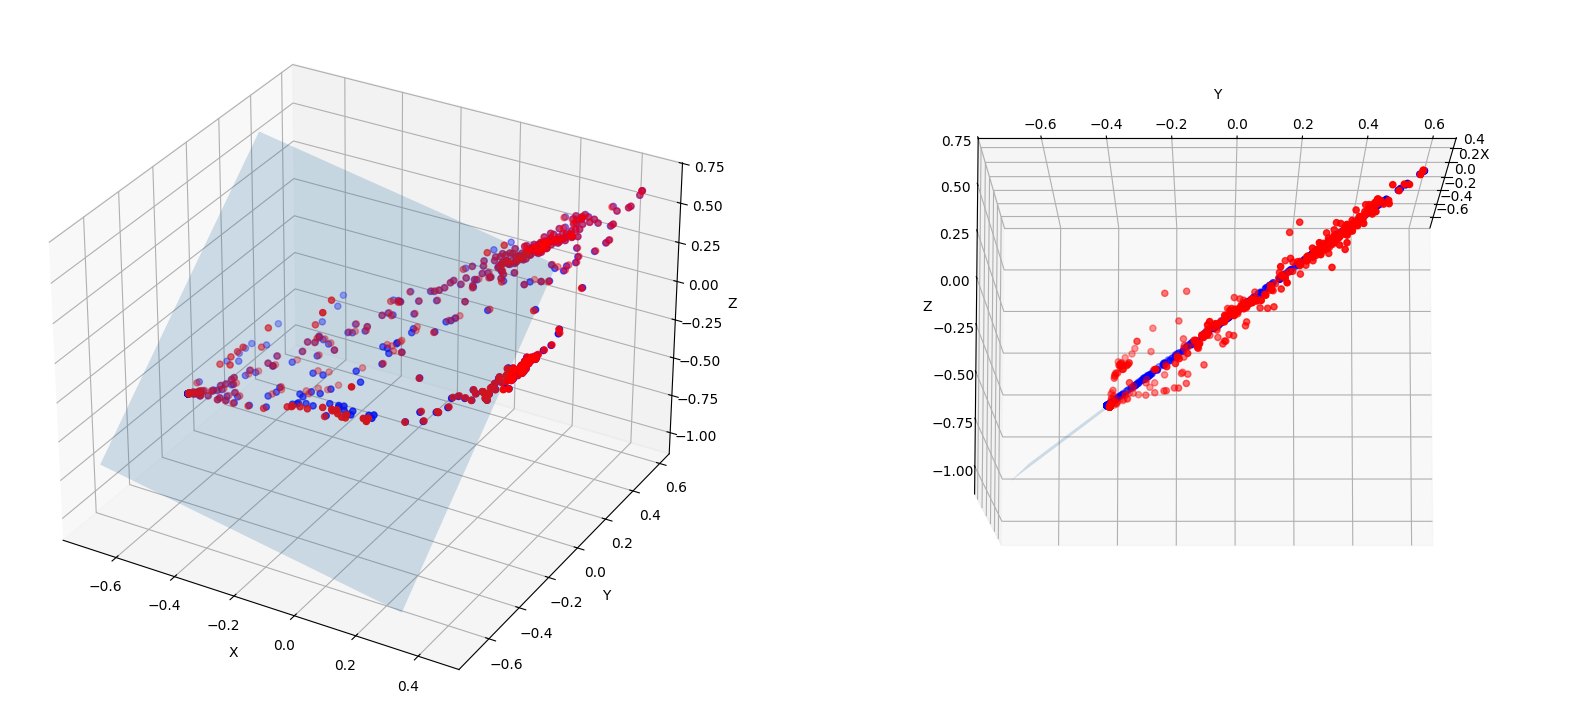

In [258]:
# this code plots the 3D plane and the pixels colors
# it is not part of the exercise but you can use it to check your results
# v is the plane parameters
# image_projected is the projected pixels colors
# image_flat is the original pixels colors

xx, yy = np.meshgrid(np.arange(-0.7,0.7,0.5), np.arange(-0.7,0.7,0.5))
z = (-v[0] * xx - v[1] * yy) / v[2]

fig = plt.figure(figsize=(20,10))
for figid in [1, 2]:
    # scatter the pixels colors
    ax = fig.add_subplot(1,2,figid, projection='3d')
    ax.scatter(image_projected[:,0], image_projected[:,1], image_projected[:,2],c='b')
    ax.scatter(image_flat[:,0], image_flat[:,1], image_flat[:,2], c='r')
    # plot the surface
    ax.plot_surface(xx, yy, z, alpha=0.2)

    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('auto')
    if figid == 2:
        ax.view_init(-9, 0, 0)

plt.show()

Well done!

You've completed HW1, you're well on your way to become a computer vision practitioner.